In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats import zscore
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
features = pd.read_excel("ppp-data-dictionary.xlsx")
features

,Field Name,Field Description
0,LoanNumber,Loan Number (unique identifier)
1,DateApproved,Loan Funded Date
2,SBAOfficeCode,SBA Origination Office Code
3,ProcessingMethod,Loan Delivery Method (PPP for first draw; PPS ...
4,BorrowerName,Borrower Name
5,BorrowerAddress,Borrower Street Address
6,BorrowerCity,Borrower City
7,BorrowerState,Borrower State
8,BorrowerZip,Borrower Zip Code
9,LoanStatusDate,Loan Status Date\n- Loan Status Date is blank...


In [3]:
df0   = pd.read_csv("public_150k_plus_230101.csv")
df1  = pd.read_csv("public_up_to_150k_1_230101.csv")
df2  = pd.read_csv("public_up_to_150k_2_230101.csv")
df3  = pd.read_csv("public_up_to_150k_3_230101.csv")
df4  = pd.read_csv("public_up_to_150k_4_230101.csv")
df5  = pd.read_csv("public_up_to_150k_5_230101.csv")
# df6  = pd.read_csv("public_up_to_150k_6_230101.csv")
# df7  = pd.read_csv("public_up_to_150k_7_230101.csv")
# df8  = pd.read_csv("public_up_to_150k_8_230101.csv")
# df9  = pd.read_csv("public_up_to_150k_9_230101.csv")
# df10 = pd.read_csv("public_up_to_150k_10_230101.csv")
# df11 = pd.read_csv("public_up_to_150k_11_230101.csv")
# df12 = pd.read_csv("public_up_to_150k_12_230101.csv")

In [4]:
df = pd.concat([df0, df1, df2, df3, df4, df5])


In [5]:
df.head()

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,...,BusinessType,OriginatingLenderLocationID,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender,Veteran,NonProfit,ForgivenessAmount,ForgivenessDate
0,9547507704,05/01/2020,464.0,PPP,"SUMTER COATINGS, INC.",2410 Highway 15 South,Sumter,NaN,29150-9662,12/18/2020,...,Corporation,19248.0,Synovus Bank,COLUMBUS,GA,Unanswered,Unanswered,NaN,773553.37,11/20/2020
1,9777677704,05/01/2020,464.0,PPP,"PLEASANT PLACES, INC.",7684 Southrail Road,North Charleston,NaN,29420-9000,09/28/2021,...,Sole Proprietorship,19248.0,Synovus Bank,COLUMBUS,GA,Male Owned,Non-Veteran,NaN,746336.24,08/12/2021
2,5791407702,05/01/2020,1013.0,PPP,BOYER CHILDREN'S CLINIC,1850 BOYER AVE E,SEATTLE,NaN,98112-2922,03/17/2021,...,Non-Profit Organization,9551.0,"Bank of America, National Association",CHARLOTTE,NC,Unanswered,Unanswered,Y,696677.49,02/10/2021
3,6223567700,05/01/2020,920.0,PPP,KIRTLEY CONSTRUCTION INC,1661 MARTIN RANCH RD,SAN BERNARDINO,NaN,92407-1740,10/16/2021,...,Corporation,9551.0,"Bank of America, National Association",CHARLOTTE,NC,Male Owned,Non-Veteran,NaN,395264.11,09/10/2021
4,9662437702,05/01/2020,101.0,PPP,AERO BOX LLC,NaN,NaN,NaN,NaN,08/17/2021,...,NaN,57328.0,The Huntington National Bank,COLUMBUS,OH,Unanswered,Unanswered,NaN,370819.35,04/08/2021


In [6]:
len(df["LoanNumber"].unique())

5468531

In [7]:
df.isna().sum()

LoanNumber                           0
DateApproved                         0
SBAOfficeCode                       27
ProcessingMethod                     0
BorrowerName                        25
BorrowerAddress                    182
BorrowerCity                       173
BorrowerState                      164
BorrowerZip                        171
LoanStatusDate                  383394
LoanStatus                           0
Term                                 0
SBAGuarantyPercentage                0
InitialApprovalAmount                0
CurrentApprovalAmount                0
UndisbursedAmount                  687
FranchiseName                  5387186
ServicingLenderLocationID           27
ServicingLenderName                 27
ServicingLenderAddress              27
ServicingLenderCity                 27
ServicingLenderState                27
ServicingLenderZip                  27
RuralUrbanIndicator                  0
HubzoneIndicator                     0
LMIIndicator             

In [8]:
df.describe()

,LoanNumber,SBAOfficeCode,Term,SBAGuarantyPercentage,InitialApprovalAmount,CurrentApprovalAmount,UndisbursedAmount,ServicingLenderLocationID,JobsReported,NAICSCode,UTILITIES_PROCEED,PAYROLL_PROCEED,MORTGAGE_INTEREST_PROCEED,RENT_PROCEED,REFINANCE_EIDL_PROCEED,HEALTH_CARE_PROCEED,DEBT_INTEREST_PROCEED,OriginatingLenderLocationID,ForgivenessAmount
count,5.468531e+06,5.468504e+06,5.468531e+06,5468531.0,5.468531e+06,5.468531e+06,5.467844e+06,5.468504e+06,5.468527e+06,5.409987e+06,1.712471e+06,5.462688e+06,1.371430e+05,2.735610e+05,6.081700e+04,1.155550e+05,7.086700e+04,5.468504e+06,4.982426e+06
mean,5.464290e+09,6.286875e+02,4.542964e+01,100.0,1.159815e+05,1.154688e+05,3.393463e+00,2.028616e+05,1.214483e+01,5.371543e+05,3.425039e+03,1.122045e+05,1.801283e+04,2.400565e+04,3.759458e+03,2.478031e+04,7.144214e+03,2.019802e+05,1.214825e+05
std,2.561085e+09,2.383743e+02,1.776660e+01,0.0,3.695046e+05,3.663093e+05,1.737469e+03,2.092028e+05,3.474361e+01,1.929673e+05,3.832714e+04,3.545731e+05,9.490372e+04,7.163739e+04,3.870463e+04,7.590487e+04,3.781402e+04,2.090415e+05,3.741558e+05
min,1.000007e+09,1.010000e+02,0.000000e+00,100.0,0.000000e+00,1.000000e+00,0.000000e+00,2.000000e+01,-6.000000e+00,1.111100e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000e-02
25%,3.275363e+09,4.550000e+02,2.400000e+01,100.0,1.088000e+04,1.085600e+04,0.000000e+00,2.506800e+04,1.000000e+00,4.461200e+05,1.000000e+00,1.063700e+04,0.000000e+00,2.200000e+03,0.000000e+00,4.286550e+02,0.000000e+00,2.504400e+04,1.086389e+04
50%,5.461178e+09,5.070000e+02,6.000000e+01,100.0,2.083200e+04,2.083200e+04,0.000000e+00,9.437100e+04,2.000000e+00,5.413200e+05,1.000000e+00,2.083000e+04,1.088420e+03,6.500000e+03,0.000000e+00,5.006000e+03,0.000000e+00,9.304200e+04,2.092889e+04
75%,7.626278e+09,9.120000e+02,6.000000e+01,100.0,7.015000e+04,7.000000e+04,0.000000e+00,4.567560e+05,9.000000e+00,7.111900e+05,1.000000e+00,6.800000e+04,6.820000e+03,2.031250e+04,0.000000e+00,2.000000e+04,2.800000e+03,4.567560e+05,8.005041e+04
max,9.999009e+09,9.030000e+03,1.800000e+02,100.0,1.000000e+07,1.000000e+07,2.400000e+06,5.381600e+05,5.000000e+02,9.999900e+05,1.000000e+07,1.000000e+07,1.000000e+07,5.518278e+06,2.951590e+06,3.880000e+06,2.497617e+06,5.334790e+05,1.026528e+07


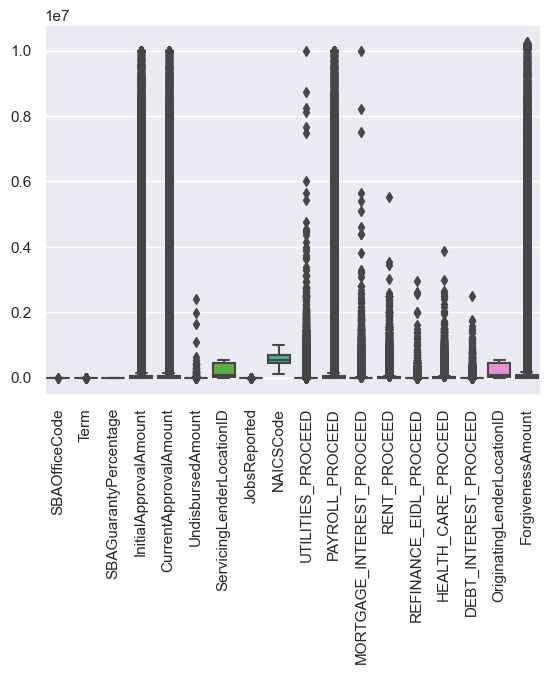

In [9]:
sns.boxplot(data=df.iloc[:,1:], orient="v")
plt.xticks(rotation=90)
plt.show()

In [10]:
z_scores = df.select_dtypes(include='number').apply(zscore)
threshold = 3
outlier_mask = (z_scores.abs() > threshold).any(axis=1)
df = df[~outlier_mask]

In [11]:
df["BorrowerName"].fillna("Unknown", inplace =True)

In [12]:
df["BorrowerAddress"].fillna("Unknown" , inplace= True)

In [13]:
df["BorrowerCity"].fillna("Unknown", inplace = True)

In [14]:
df["BorrowerState"].fillna("Unknown", inplace= True)

In [15]:
df["BorrowerZip"].fillna("Unknown", inplace =True)

In [16]:
df["LoanStatusDate"] = pd.to_datetime(df["LoanStatusDate"] )

In [17]:
df["LoanStatusDate"].fillna(df["LoanStatusDate"].mean(), inplace=True)

In [18]:
df["UndisbursedAmount"].fillna(df["UndisbursedAmount"].mode()[0],inplace = True)

In [19]:
df["FranchiseName"].fillna("Unknown", inplace= True)

In [20]:
df["BusinessAgeDescription"].fillna(df["BusinessAgeDescription"].mode()[0],inplace = True)

In [21]:
df["ProjectCity"].fillna("Unknown",inplace = True)

In [22]:
df["ProjectCountyName"].fillna("Unknown",inplace= True)

In [23]:
df["ProjectState"].fillna("Unknown",inplace = True)

In [24]:
df["ProjectZip"].fillna("Unknown", inplace =True)

In [25]:
df["CD"].fillna(df["CD"].mode()[0], inplace= True)

In [26]:
df["JobsReported"].fillna(df["JobsReported"].mode()[0], inplace = True)

In [27]:
df["NAICSCode"].fillna(df["NAICSCode"].mode()[0],inplace = True)

In [28]:
df["UTILITIES_PROCEED"].fillna(df["UTILITIES_PROCEED"].median(), inplace = True)

In [29]:
df["PAYROLL_PROCEED"].fillna(df["PAYROLL_PROCEED"].median(),inplace = True)

In [30]:
df["BusinessType"].fillna(df["BusinessType"].mode()[0], inplace =True)

In [31]:
df["ForgivenessAmount"].fillna(df["ForgivenessAmount"].median(), inplace =True)

In [32]:
df["ForgivenessDate"] = pd.to_datetime(df["ForgivenessDate"])

In [33]:
df["ForgivenessDate"].fillna(df["ForgivenessDate"].mean() , inplace = True)

In [34]:
df.isna().sum()

LoanNumber                           0
DateApproved                         0
SBAOfficeCode                       27
ProcessingMethod                     0
BorrowerName                         0
BorrowerAddress                      0
BorrowerCity                         0
BorrowerState                        0
BorrowerZip                          0
LoanStatusDate                       0
LoanStatus                           0
Term                                 0
SBAGuarantyPercentage                0
InitialApprovalAmount                0
CurrentApprovalAmount                0
UndisbursedAmount                    0
FranchiseName                        0
ServicingLenderLocationID           27
ServicingLenderName                 27
ServicingLenderAddress              27
ServicingLenderCity                 27
ServicingLenderState                27
ServicingLenderZip                  27
RuralUrbanIndicator                  0
HubzoneIndicator                     0
LMIIndicator             

In [35]:
df.drop(["MORTGAGE_INTEREST_PROCEED", "RENT_PROCEED", "REFINANCE_EIDL_PROCEED", "HEALTH_CARE_PROCEED", 
         "DEBT_INTEREST_PROCEED", "NonProfit", "Veteran", "Ethnicity", "ServicingLenderZip","OriginatingLender",
         "OriginatingLenderCity","BorrowerName","SBAOfficeCode","LoanNumber"], axis=1, inplace = True)


### ANALYSIS ON LOAN AMOUNT

#### State Average vs National Average

In [36]:
state_avg = df.groupby("BorrowerState")["CurrentApprovalAmount"].mean()
national_avg = df["CurrentApprovalAmount"].mean()

#### Average loan for a particular city.

In [37]:
df["BorrowerCity"] = df["BorrowerCity"].apply(lambda x: x.replace(",","").strip().lower())

In [38]:
Avg_loan_particular_city = df.groupby(["BorrowerCity"]).agg({"CurrentApprovalAmount": "mean"})
Avg_loan_particular_city.rename(columns= {"CurrentApprovalAmount": "Avg_loan_particular_city"}, inplace= True)
Avg_loan_particular_city

,Avg_loan_particular_city
BorrowerCity,
#216,625.0000
#3,22645.0000
#303-b,5500.0000
(north hollywood area) los angeles,111410.0000
****,52500.0000
...,...
zuni,394013.9750
zurich,21092.8560
zwingle,14706.7675


#### Loan Amount grouped by other KPIs like Business Type, Race,Gender etc.

In [39]:
loan_amount_by_business_type = df.groupby("BusinessType")[["CurrentApprovalAmount"]].sum()
loan_amount_by_race = df.groupby("Race")[["CurrentApprovalAmount"]].sum()
loan_amount_by_gender = df.groupby("Gender")[["CurrentApprovalAmount"]].sum()

In [40]:
loan_amount_by_business_type.rename(columns = {"CurrentApprovalAmount":"loan_amount_by_business_type"}, inplace=True)
loan_amount_by_business_type

,loan_amount_by_business_type
BusinessType,
"501(c) – Non Profit except 3,4,6,",2.994294e+06
501(c)19 – Non Profit Veterans,1.632663e+06
501(c)3 – Non Profit,6.511119e+08
501(c)6 – Non Profit Membership,3.268032e+08
Cooperative,9.530842e+08
Corporation,1.752998e+11
Employee Stock Ownership Plan(ESOP),2.343908e+08
Housing Co-op,4.956572e+07
Independent Contractors,4.702589e+09


In [41]:
loan_amount_by_race.rename(columns = {"CurrentApprovalAmount":"loan_amount_by_race"}, inplace=True)
loan_amount_by_race

,loan_amount_by_race
Race,
American Indian or Alaska Native,3.172689e+09
Asian,1.109731e+10
Black or African American,9.723637e+09
Eskimo & Aleut,5.916204e+05
Multi Group,2.795430e+06
Native Hawaiian or Other Pacific Islander,3.628826e+08
Puerto Rican,9.212640e+06
Unanswered,3.446527e+11
White,6.873936e+10


In [42]:
loan_amount_by_gender.rename(columns = {"CurrentApprovalAmount":"loan_amount_by_gender"}, inplace=True)
loan_amount_by_gender

,loan_amount_by_gender
Gender,
Female Owned,3.764240e+10
Male Owned,1.370567e+11
Unanswered,2.630620e+11


#### Find a linear/non-linear relation between number of jobs reported and loan amount.

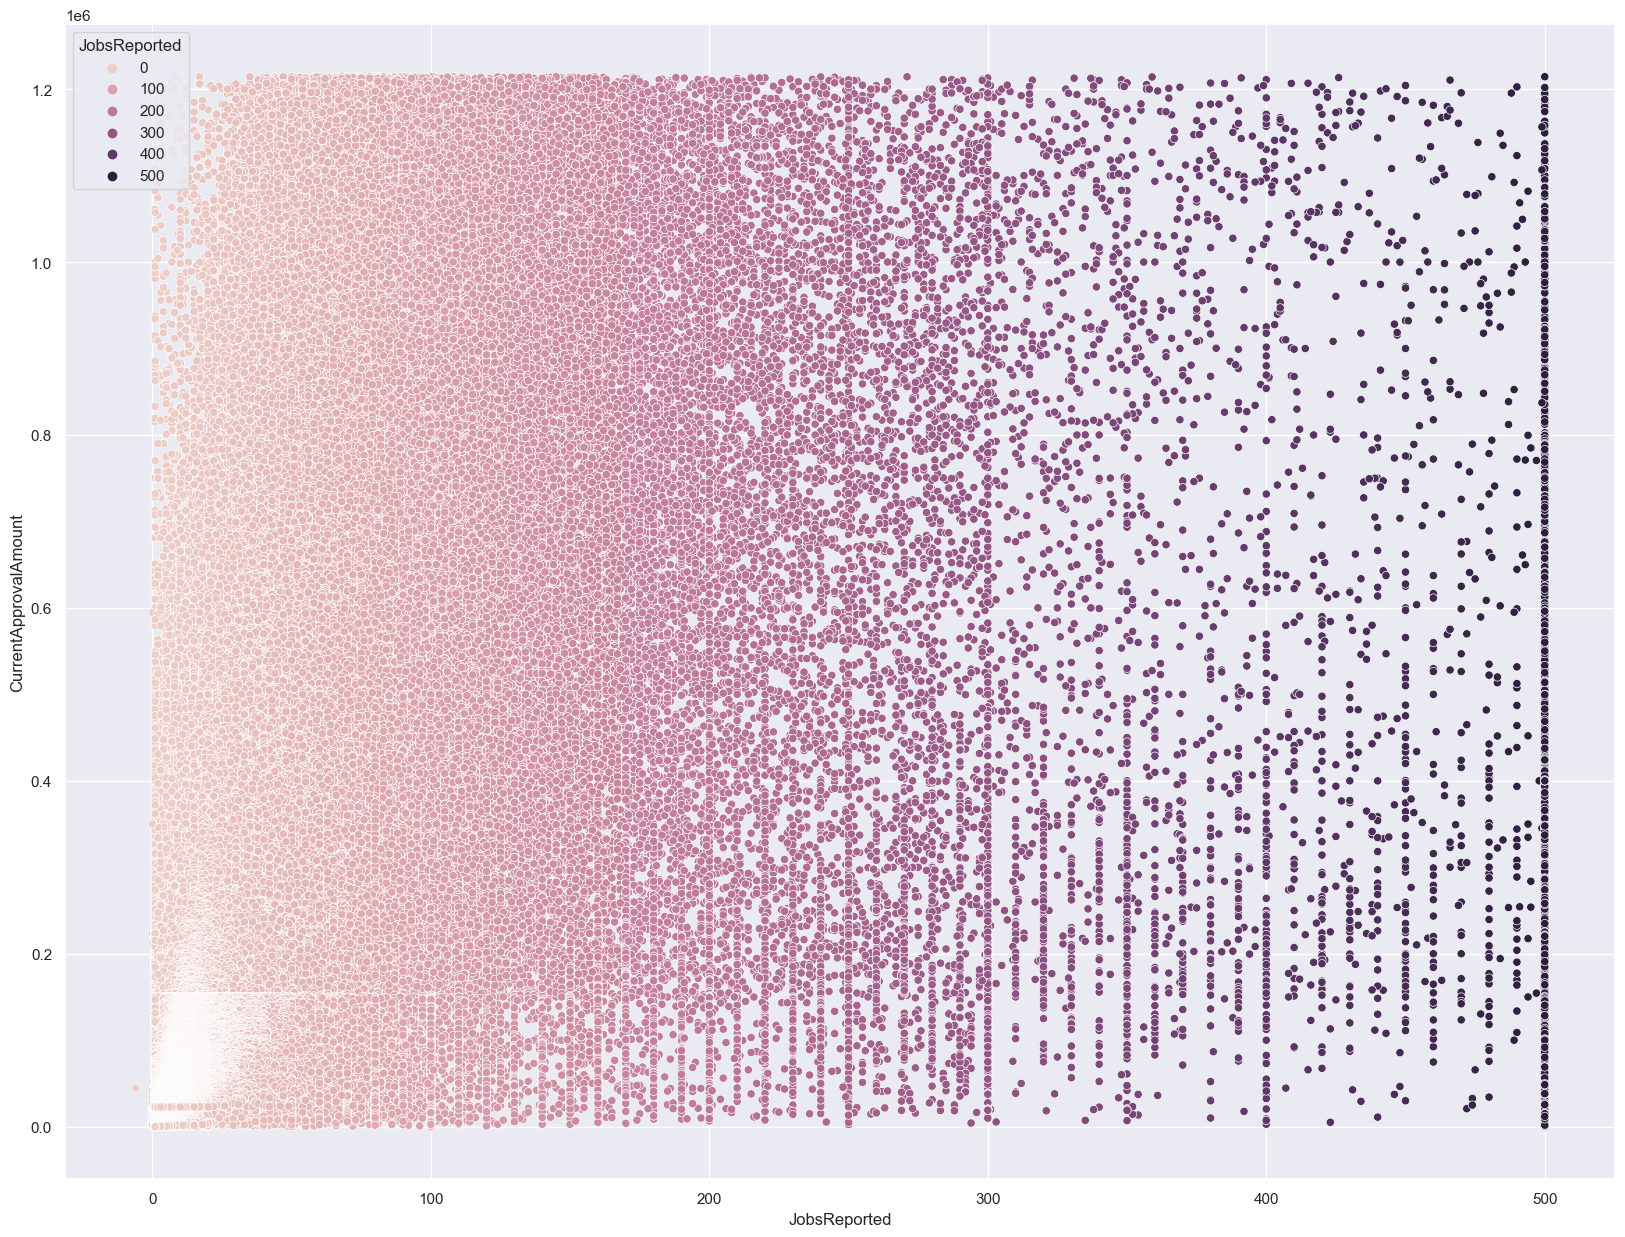

In [43]:
plt.figure(figsize = (20,15))
sns.scatterplot(data=df, x='JobsReported', y='CurrentApprovalAmount', hue= "JobsReported")
plt.show()

##### uuuu

#### Amount of loan given by each lender etc.

In [44]:
amt_of_loan_given_by_each_lender = df.groupby('ServicingLenderName', as_index = False)[['CurrentApprovalAmount']].sum()
amt_of_loan_given_by_each_lender.rename(columns={"CurrentApprovalAmount":"Lend_Amount"}, inplace = True)

amt_of_loan_given_by_each_lender

,ServicingLenderName,Lend_Amount
0,"\tFarm Credit Services of Western Arkansas, ACA",9.978917e+06
1,"\tFarm Credit of Western Oklahoma, ACA",4.275830e+05
2,"\tYankee Farm Credit, ACA",2.642957e+06
3,121 Financial CU,4.843840e+07
4,1st Advantage Bank,1.621496e+07
...,...,...
4417,farmbank,8.091162e+05
4418,i3 Bank,1.385164e+07
4419,iTHINK Financial CU,1.022806e+08
4420,"immito, LLC",3.522306e+07


### ANALYSIS CITY WISE

#### City wise distribution of businesses granted loans.

In [45]:
BorrowerCity = df["BorrowerCity"].value_counts().index.tolist()
Count_of_loan = df["BorrowerCity"].value_counts().tolist()
df_city_distribution_of_loan = pd.DataFrame({"BorrowerCity": BorrowerCity, "Count_of_loan": Count_of_loan})
df_city_distribution_of_loan

,BorrowerCity,Count_of_loan
0,chicago,186196
1,miami,120045
2,los angeles,118334
3,atlanta,85255
4,orlando,60274
...,...,...
25625,24012 eltoro rd,1
25626,buffalo ny 14202,1
25627,rancho santa martgarita,1
25628,visalia ca 93277,1


#### Highest loan lender in each city

In [46]:
highest_loan_lender = df.groupby(['BorrowerCity'])['CurrentApprovalAmount', 'ServicingLenderName'].apply(lambda x: x.loc[x['CurrentApprovalAmount'].idxmax()])
highest_loan_lender

0  \
BorrowerCity                                                                     
#216            CurrentApprovalAmount                                    625.0   
                ServicingLenderName                        Texas National Bank   
#3              CurrentApprovalAmount                                  22645.0   
                ServicingLenderName    Manufacturers and Traders Trust Company   
#303-b          CurrentApprovalAmount                                   5500.0   
...                                                                        ...   
zwingle         ServicingLenderName                        Dupaco Community CU   
zwolle          CurrentApprovalAmount                                 281000.0   
                ServicingLenderName                            Cross Keys Bank   
{peachtree city CurrentApprovalAmount                                 146457.3   
                ServicingLenderName                               Synovus Bank   

                                       CurrentApprovalAmount  \
BorrowerCity                                                   
#216            CurrentApprovalAmount                    NaN   
                ServicingLenderName                      NaN   
#3              CurrentApprovalAmount                    NaN   
                ServicingLenderName                      NaN   
#303-b          CurrentApprovalAmount                    NaN   
...                                                      ...   
zwingle         ServicingLenderName                      NaN   
zwolle          CurrentApprovalAmount                    NaN   
                ServicingLenderName                      NaN   
{peachtree city CurrentApprovalAmount                    NaN   
                ServicingLenderName                      NaN   

                                      ServicingLenderName  
BorrowerCity                                               
#216            CurrentApprovalAmount                 NaN  
                ServicingLenderName                   NaN  
#3              CurrentApprovalAmount                 NaN  
                ServicingLenderName                   NaN  
#303-b          CurrentApprovalAmount                 NaN  
...                                                   ...  
zwingle         ServicingLenderName                   NaN  
zwolle          CurrentApprovalAmount                 NaN  
                ServicingLenderName                   NaN  
{peachtree city CurrentApprovalAmount                 NaN  
                ServicingLenderName                   NaN  

[51260 rows x 3 columns]

In [47]:
highest_amt_lender_from_each_city = df.groupby(["ServicingLenderCity","ServicingLenderName"], as_index =False)[["CurrentApprovalAmount"]].sum()
highest_amt_lender_from_each_city = highest_amt_lender_from_each_city.sort_values(['ServicingLenderCity', 'CurrentApprovalAmount'], ascending=[True, False]).groupby('ServicingLenderCity').first()
highest_amt_lender_from_each_city

,ServicingLenderName,CurrentApprovalAmount
ServicingLenderCity,,
ABBEVILLE,Gulf Coast Bank,5.756622e+07
ABBOTSFORD,AbbyBank,1.772838e+07
ABERDEEN,Bank of the Pacific,1.000782e+08
ABERNATHY,The First State Bank,1.982500e+06
ABILENE,"First Financial Bank, National Association",4.553584e+08
...,...,...
Youngstown,"Valley Economic Development Partners, Inc.",9.379203e+06
ZACHARY,Bank of Zachary,2.055745e+07
ZANESVILLE,North Valley Bank,3.292545e+07


#### Compare cities on the basis of loan amounts etc

In [48]:
compare_city_on_loan_amount = df[["BorrowerCity" , "CurrentApprovalAmount"]]
compare_city_on_loan_amount["BorrowerCity1"] = compare_city_on_loan_amount["BorrowerCity"]
compare_city_on_loan_amount["CurrentApprovalAmount1"] = compare_city_on_loan_amount["CurrentApprovalAmount"]
compare_city_on_loan_amount["CurrentApprovalAmount2"] = compare_city_on_loan_amount["CurrentApprovalAmount"]



In [49]:
compare_city_on_loan_amount

,BorrowerCity,CurrentApprovalAmount,BorrowerCity1,CurrentApprovalAmount1,CurrentApprovalAmount2
0,sumter,769358.78,sumter,769358.78,769358.78
1,north charleston,736927.79,north charleston,736927.79,736927.79
2,seattle,691355.00,seattle,691355.00,691355.00
3,san bernardino,499871.00,san bernardino,499871.00,499871.00
4,unknown,367437.00,unknown,367437.00,367437.00
...,...,...,...,...,...
899995,louisville,22750.00,louisville,22750.00,22750.00
899996,west liberty,22750.00,west liberty,22750.00,22750.00
899997,la grange,22747.00,la grange,22747.00,22747.00
899998,bowling green,22745.73,bowling green,22745.73,22745.73


In [50]:
compare_city_on_loan_amount = compare_city_on_loan_amount.groupby(["BorrowerCity"],as_index = False).agg({"CurrentApprovalAmount":"mean",
                                                                           "BorrowerCity1":"count",
                                                                           "CurrentApprovalAmount1":"min",
                                                                           "CurrentApprovalAmount2":"max"})

In [51]:
compare_city_on_loan_amount = compare_city_on_loan_amount.rename(columns= {"CurrentApprovalAmount":"Avg_amt_loan", 
                                             "BorrowerCity1":"count_of_loan_approved",
                                            "CurrentApprovalAmount1": "min_amt_loan", 
                                             "CurrentApprovalAmount2": "max_amt_loan"}).sort_values(by="count_of_loan_approved",
                                                                                                   ascending= False)
compare_city_on_loan_amount

,BorrowerCity,Avg_amt_loan,count_of_loan_approved,min_amt_loan,max_amt_loan
4631,chicago,39474.793130,186196,45.0,1213407.00
14485,miami,36438.510947,120045,1.0,1211700.00
13255,los angeles,48901.411977,118334,30.0,1214207.97
1896,atlanta,43114.670496,85255,1.0,1211467.00
17091,orlando,37168.690399,60274,63.0,1205787.00
...,...,...,...,...,...
11944,kosse,239865.000000,1,239865.0,239865.00
11945,kotlik,20052.000000,1,20052.0,20052.00
11949,koyukuk,9000.000000,1,9000.0,9000.00
11950,krakow,526700.000000,1,526700.0,526700.00


### ANALYSIS ON BUSINESS TYPE

#### Number of jobs reported by different business types.

In [52]:
business_job_report = df[["BusinessType", "JobsReported"]]

In [53]:
business_job_report["BusinessType1"] = df["BusinessType"]
business_job_report["JobsReported1"] = df["JobsReported"]
business_job_report["JobsReported2"] = df["JobsReported"]
business_job_report["JobsReported3"] = df["JobsReported"]

In [54]:
business_job_report_min_max_avg_total = business_job_report.groupby(["BusinessType"], as_index = False).agg({"BusinessType1":"count",
                                                                    "JobsReported1":"min",
                                                                    "JobsReported2": "max",
                                                                    "JobsReported3":"mean",
                                                                    "JobsReported": "sum"})
business_job_report_min_max_avg_total.rename(columns = {"BusinessType1":"count_of_loan_approved",
                                                       "JobsReported1":"min_job_provided",
                                                       "JobsReported2":"max_job_provided",
                                                       "JobsReported3" : "avg_job_provided",
                                                       "JobsReported":"total_job_provided"}, inplace =True)


In [55]:
business_job_report_min_max_avg_total["avg_job_provided"] = business_job_report_min_max_avg_total["avg_job_provided"].apply(lambda x: round(x,0))
business_job_report_min_max_avg_total

,BusinessType,count_of_loan_approved,min_job_provided,max_job_provided,avg_job_provided,total_job_provided
0,"501(c) – Non Profit except 3,4,6,",16,4.0,101.0,30.0,484.0
1,501(c)19 – Non Profit Veterans,101,1.0,64.0,6.0,588.0
2,501(c)3 – Non Profit,4957,1.0,500.0,19.0,96378.0
3,501(c)6 – Non Profit Membership,2421,1.0,500.0,10.0,23196.0
4,Cooperative,4652,1.0,500.0,20.0,91291.0
5,Corporation,1250788,0.0,500.0,16.0,19786993.0
6,Employee Stock Ownership Plan(ESOP),578,1.0,209.0,32.0,18665.0
7,Housing Co-op,165,1.0,125.0,20.0,3301.0
8,Independent Contractors,396268,0.0,500.0,1.0,406682.0
9,Joint Venture,632,1.0,423.0,11.0,6660.0


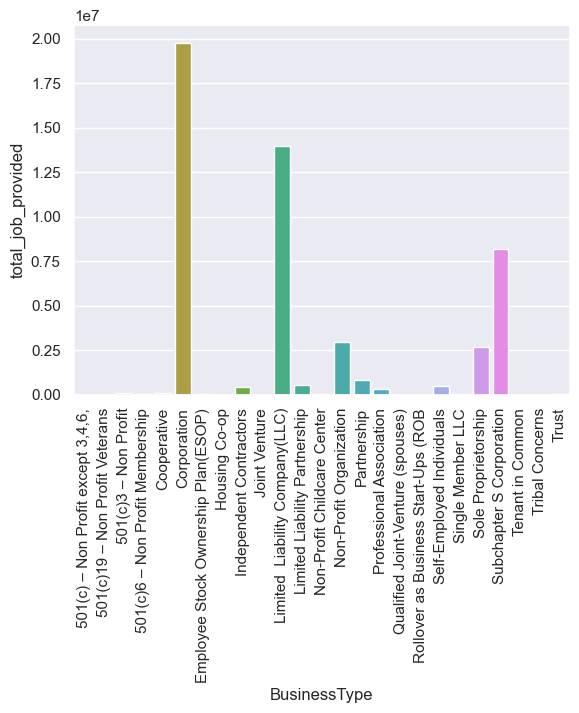

In [56]:
sns.barplot(x="BusinessType", y="total_job_provided", data=business_job_report_min_max_avg_total)
plt.xticks(rotation=90)
plt.show()

#### Average Loan Amount per business type

In [57]:
avg_job_provided_each_business_type = business_job_report_min_max_avg_total[["BusinessType", "avg_job_provided"]]
avg_job_provided_each_business_type

,BusinessType,avg_job_provided
0,"501(c) – Non Profit except 3,4,6,",30.0
1,501(c)19 – Non Profit Veterans,6.0
2,501(c)3 – Non Profit,19.0
3,501(c)6 – Non Profit Membership,10.0
4,Cooperative,20.0
5,Corporation,16.0
6,Employee Stock Ownership Plan(ESOP),32.0
7,Housing Co-op,20.0
8,Independent Contractors,1.0
9,Joint Venture,11.0


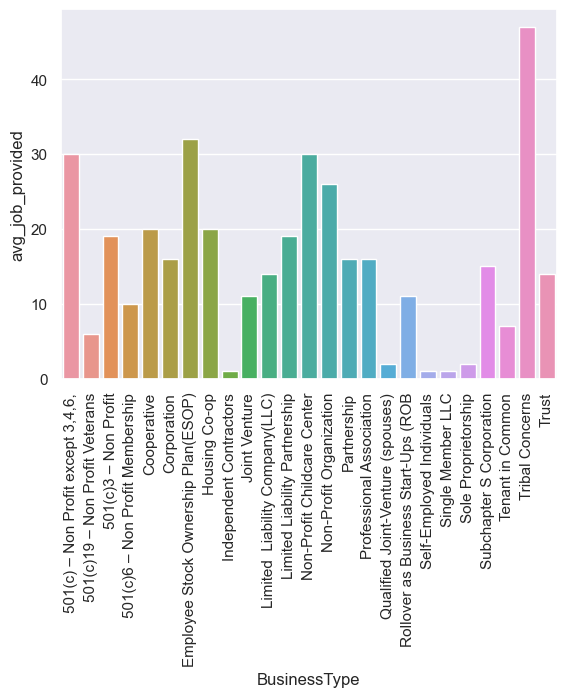

In [58]:
sns.barplot(x="BusinessType", y="avg_job_provided", data=avg_job_provided_each_business_type)
plt.xticks(rotation=90)
plt.show()

#### Compare loan amounts of Male Owned businesses VS FemaleOwned businesses etc

In [59]:
male_female_df = df[(df["Gender"] == "Male Owned") | (df["Gender"] == "Female Owned")]

avg_loan_by_gender = male_female_df.groupby("Gender").agg({"CurrentApprovalAmount": "mean"})
avg_loan_by_gender

,CurrentApprovalAmount
Gender,
Female Owned,51668.900422
Male Owned,99283.143326


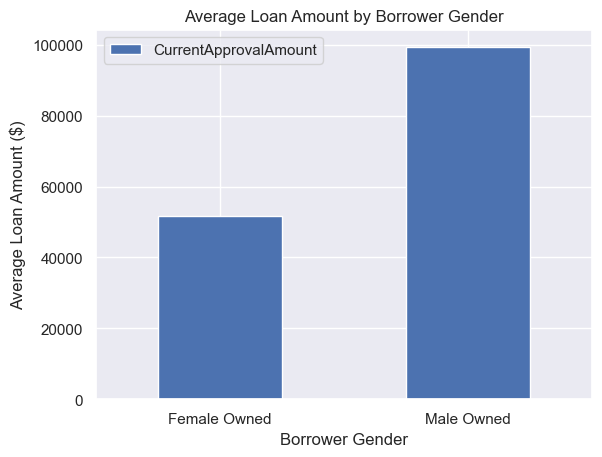

In [60]:
avg_loan_by_gender.plot(kind="bar", rot=0)
plt.title("Average Loan Amount by Borrower Gender")
plt.xlabel("Borrower Gender")
plt.ylabel("Average Loan Amount ($)")
plt.show()


### ANALYSIS ON DATE APPROVED

#### Find months in which high amount of loans were sanctioned.

In [61]:
df["DateApproved"] = pd.to_datetime(df["DateApproved"])
df["Approval_year"] =df["DateApproved"].dt.year
df["ApprovalMonth"] = df["DateApproved"].dt.month
monthly_loan_amounts = df.groupby(["Approval_year", "ApprovalMonth"], as_index = False)[["CurrentApprovalAmount"]].sum()
max_loan_amounts = monthly_loan_amounts[monthly_loan_amounts["CurrentApprovalAmount"] == monthly_loan_amounts["CurrentApprovalAmount"].max()]
max_loan_amounts

,Approval_year,ApprovalMonth,CurrentApprovalAmount
0,2020,4,2.195290e+11


###### 4th month that mean month of APRIL is the month in which the highest amount of loan was approved.

In [62]:
monthly_loan_amounts

,Approval_year,ApprovalMonth,CurrentApprovalAmount
0,2020,4,2.195290e+11
1,2020,5,4.665202e+10
2,2020,6,6.833662e+09
3,2020,7,2.890598e+09
4,2020,8,1.513728e+09
5,2020,12,7.010620e+05
6,2021,1,4.566867e+10
7,2021,2,5.104345e+10
8,2021,3,3.458393e+10
9,2021,4,1.940759e+10


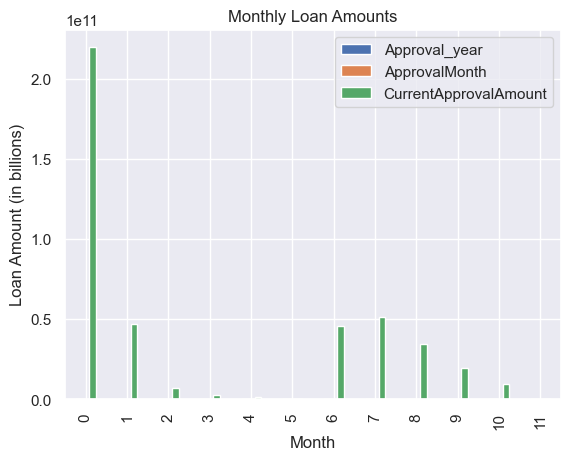

In [71]:
monthly_loan_amounts.plot(kind='bar')
plt.title('Monthly Loan Amounts')
plt.xlabel('Month')
plt.ylabel('Loan Amount (in billions)')
plt.xticks(rotation=90)
plt.show()

#### Find how many jobs were reported in the past months and predict how many could be reported in the upcoming months.

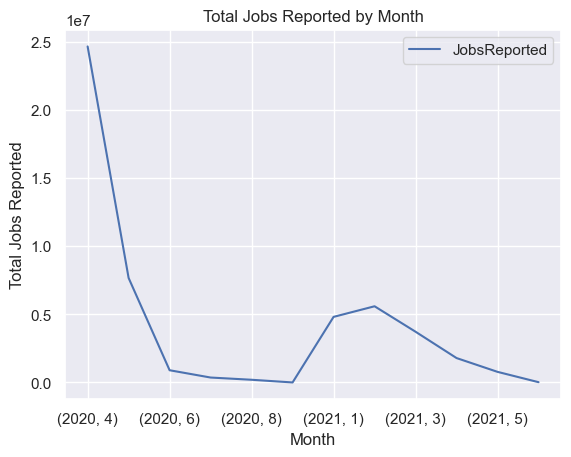

In [78]:
monthly_jobs = df.groupby(["Approval_year","ApprovalMonth"],as_index = False)[["JobsReported"]].sum()
monthly_jobs1 = df.groupby(["Approval_year","ApprovalMonth"])[["JobsReported"]].sum()
monthly_jobs1.plot()
plt.title('Total Jobs Reported by Month')
plt.xlabel('Month')
plt.ylabel('Total Jobs Reported')
plt.show()

In [74]:
monthly_jobs

,Approval_year,ApprovalMonth,JobsReported
0,2020,4,24652999.0
1,2020,5,7666231.0
2,2020,6,895963.0
3,2020,7,360668.0
4,2020,8,196908.0
5,2020,12,63.0
6,2021,1,4811091.0
7,2021,2,5589503.0
8,2021,3,3720972.0
9,2021,4,1789580.0


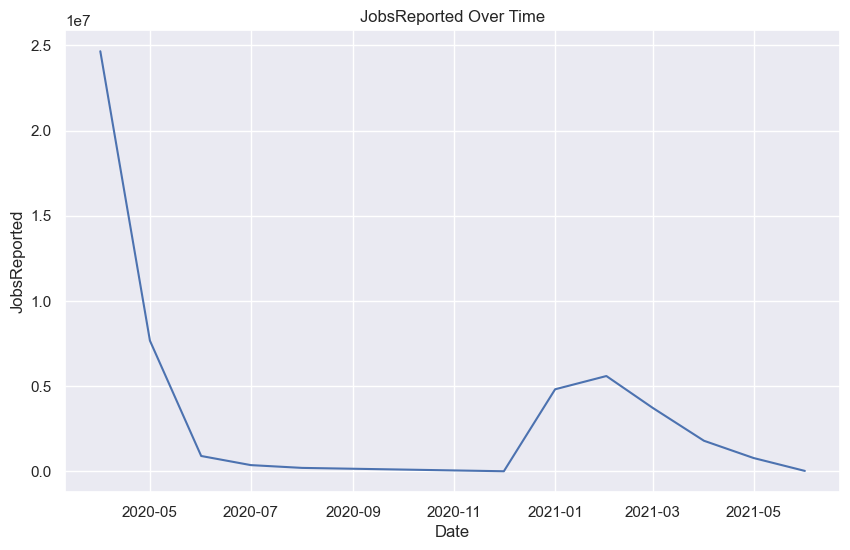

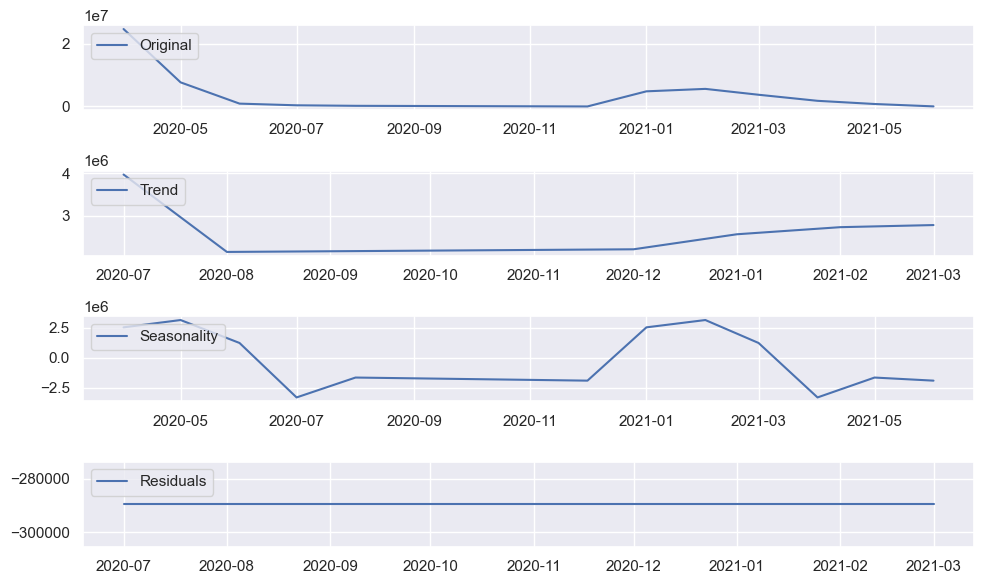

In [80]:


time_series_data = monthly_jobs
time_series_data['date'] = pd.to_datetime(time_series_data['Approval_year'].astype(str) + '-' + time_series_data['ApprovalMonth'].astype(str), format='%Y-%m')

time_series_data.set_index('date', inplace=True)


plt.figure(figsize=(10, 6))
plt.plot(time_series_data['JobsReported'])
plt.title('JobsReported Over Time')
plt.xlabel('Date')
plt.ylabel('JobsReported')
plt.show()

decomposition = seasonal_decompose(time_series_data['JobsReported'], period=6)


trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(10, 6))
plt.subplot(411)
plt.plot(time_series_data['JobsReported'], label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()



#### Based on the time series analysis of the data, we can make the following observations:

    There is a significant increase in the approval amount in May and June 2020, followed by a sharp decline in July 2020.
    There is a gradual increase in the approval amount from August to December 2020.
    In 2021, the approval amount peaked in February and then gradually declined until June.
    There is a clear seasonal trend in the data, with a peak in approvals occurring around May/June and a decline in approvals in the latter half of the year.
    The data shows a general trend of increasing approval amounts over time, although there is a lot of variability from month to month.

Overall, the time series analysis provides insights into the temporal patterns and trends in the approval amount data, which could inform business decisions and forecasting models.

#### Find total number of loans approved in each month and use it forTime Series Forecasting to predict how many loans would beapproved in the upcoming months etc.

In [96]:
no_of_loan_approved_each_month = df.groupby(["Approval_year","ApprovalMonth"],as_index = False)[["BorrowerZip"]].count()
no_of_loan_approved_each_month1 = df.groupby(["Approval_year","ApprovalMonth"])[["BorrowerZip"]].count()
no_of_loan_approved_each_month1.rename(columns = {"BorrowerZip":"loan_count"},inplace = True)
no_of_loan_approved_each_month.rename(columns = {"BorrowerZip":"loan_count"},inplace = True)
no_of_loan_approved_each_month

,Approval_year,ApprovalMonth,loan_count
0,2020,4,1359667
1,2020,5,741334
2,2020,6,188419
3,2020,7,102648
4,2020,8,52949
5,2020,12,1
6,2021,1,391654
7,2021,2,581550
8,2021,3,674908
9,2021,4,816399


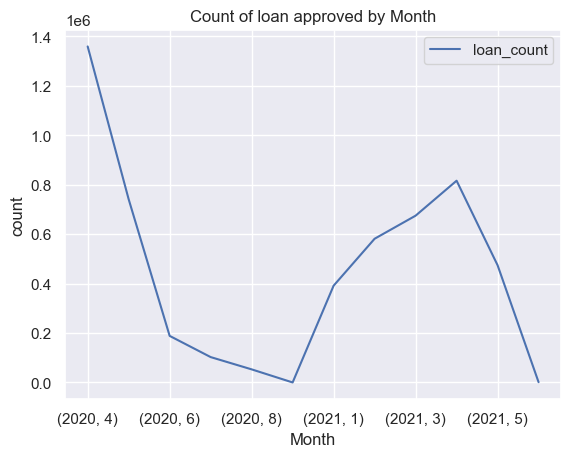

In [102]:
no_of_loan_approved_each_month1.plot()
plt.title('Count of loan approved by Month')
plt.xlabel('Month')
plt.ylabel('count')
plt.show()

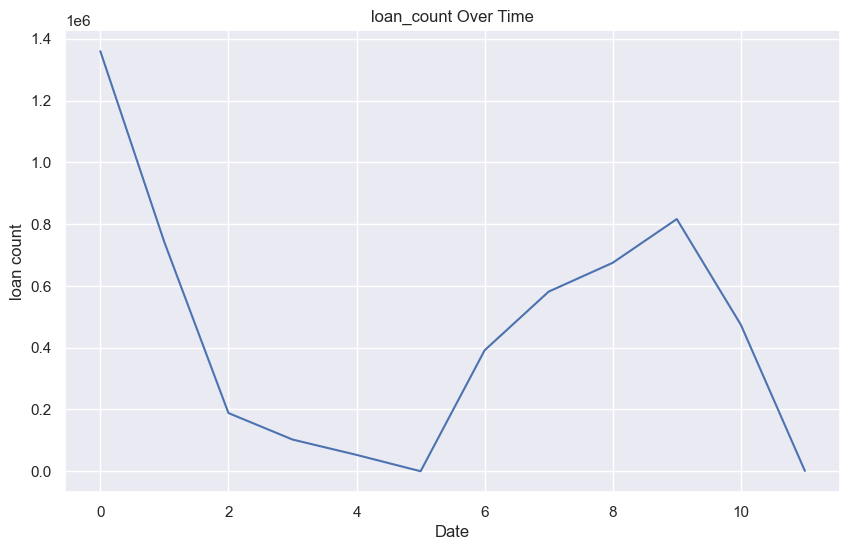

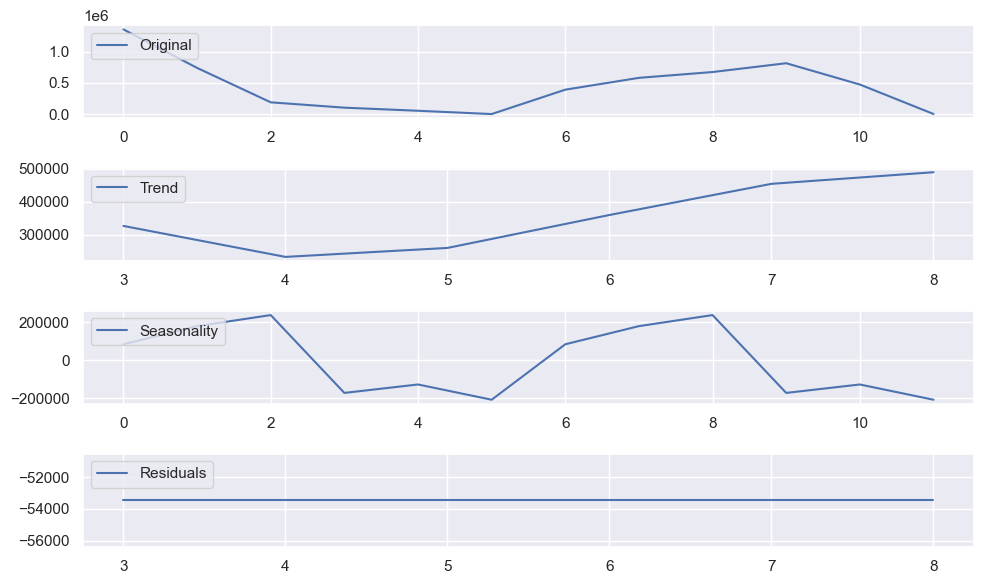

In [104]:
time_series_data2 = no_of_loan_approved_each_month

time_series_data2['date'] = pd.to_datetime(time_series_data2['Approval_year'].astype(str) + '-' + time_series_data2['ApprovalMonth'].astype(str), format='%Y-%m')
plt.figure(figsize=(10, 6))
plt.plot(time_series_data2['loan_count'])
plt.title('loan_count Over Time')
plt.xlabel('Date')
plt.ylabel('loan count')
plt.show()
decomposition = seasonal_decompose(time_series_data2['loan_count'], period=6)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(10, 6))
plt.subplot(411)
plt.plot(time_series_data2['loan_count'], label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

##### The decomposition plot shows a significant decrease in the trend component of the time series over the observed period, indicating that the number of loans approved has been decreasing. The seasonality component appears relatively stable with no clear seasonal pattern, indicating that the trend is the main driver of the observed changes in the data.

##### It is also worth noting that there is a sharp drop in loan count in December 2020, followed by a gradual increase in 2021. This could be due to a number of factors, such as changes in lending policies or economic conditions. Further investigation would be necessary to understand the reasons for this pattern.

##### line plot of the loan count over time, and decompose the time series into its trend, seasonal, and residual components. The resulting plots will give you insight into the trend and seasonality of the loan count over time.

## NOTE

when working with large datasets, a machine may not be able to load the entire dataset into memory due to memory constraints. This can result in errors, such as a "MemoryError" or a "SystemError". In such situations, it may be necessary to work with a subset of the data that can be loaded without errors.

In this case, the full dataset could not be loaded into memory, so a subset of the data was loaded instead. The code was modified to work with the available subset of data, which was correctly loaded into the system without any memory errors. While working with a subset of data may not provide the full picture, it can still provide useful insights and allow for analysis of the available data.